### Part 2 of the Titanic Case -- Data preprocessing and baseline modeling
</br>

<font color="purple">Continue from the first part of exploratory data analysis, this part will work on processing missing value, transforming data type and field content, modeling and evaluating the models.</font>

In last part, Age and Cabin were found with a lot of missing values, we will fill them at first.

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('train.csv')

In [2]:
# Fill missing ages by prediction using RandomForest

from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    
    # Take numerical features as predictors
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # Age: the first column
    y = known_age[:,0]
    # X: the rest column
    X = known_age[:,1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1) # Set seed and use all cores
    rfr.fit(X,y)
    
    # Predict and fill the missing value
    predictedAges = rfr.predict(unknown_age[:,1:])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

data_train, rfr = set_missing_ages(data_train)

In [3]:
# Replace Cabin based on Null or Not Null
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

data_train = set_Cabin_type(data_train)

## ** Notice **
</br>
<font color="purple">
The two functions above can only be run once on data_train respectively; Otherwise, all values are treated notnull values at the second time
</font>

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


When we train by classfication models, i.e., Logistic Regression, all the features should be convert to numerical values. We need to one-hot encoding our categorical features, including Pclass(though int, actually categorical), Sex, Embarked, Cabin

In [5]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

In [6]:
# Default: axis=0; 0/index, 1/column
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass],axis=1) 
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.140038,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [7]:
# Scale numerical value: Age and Fare
# A large range value will slow the convergence of logistic regression

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler() # Scale by mean and stdev

age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df.head(10)


/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561754,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.612369,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.268223,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392221,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392221,-0.486337
5,6,0,23.140038,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.478095,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.786493,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029407,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194840,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148815,-0.042956


In [27]:
# Extract the features we want and convert them into numpy array

from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:,0]
X = train_np[:,1:]

# C:regularization coefficient, the smaller the stronger; tol: stop criteria; 
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)  

clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

### <font color='purple'> In the following, we will do the same for test data</font>

In [17]:
data_test = pd.read_csv("test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In test data, we also find a missing data in Fare

In [18]:
# Fill it with 0
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0

# Fill missing value in Age
tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
x = null_age[:,1:]
# Use the previous rfr because it's trained on more data
predictedAges = rfr.predict(x)
data_test.loc[(data_test.Age.isnull()),'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix="Cabin")
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix="Embarked")
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix="Sex")
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix="Pclass")

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Ticket','Sex', 'Cabin','Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test.head(10)


/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/captunez/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307266,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.255864,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394182,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261893,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641333,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248435,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034230,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337781,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944884,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717220,-0.204154


When you'are doing with feature preprocessing, remember to keep order the same in training and testing data

In [21]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False) # If True, will add an extra column at first

In [22]:
# Show our prediction result
pd.read_csv("logistic_regression_predictions.csv").head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


The result submitted got 0.7655 accuracy on the public leaderboard. Not so bad but still need to improve.

<font color='purple'> Now we can evaluate the model to judge whether it's underfitting or overfitting. If we find 
it's overfitting now, we can select subsets of features to raise generalization or provide more data adding variety to the samples.</font>

![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_variance.png?imageView/2/w/400/q/100)
![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_bias.png?imageView/2/w/400/q/100)

</br>
<font color='purple'> We can plot learning curve to judge the condition</font>

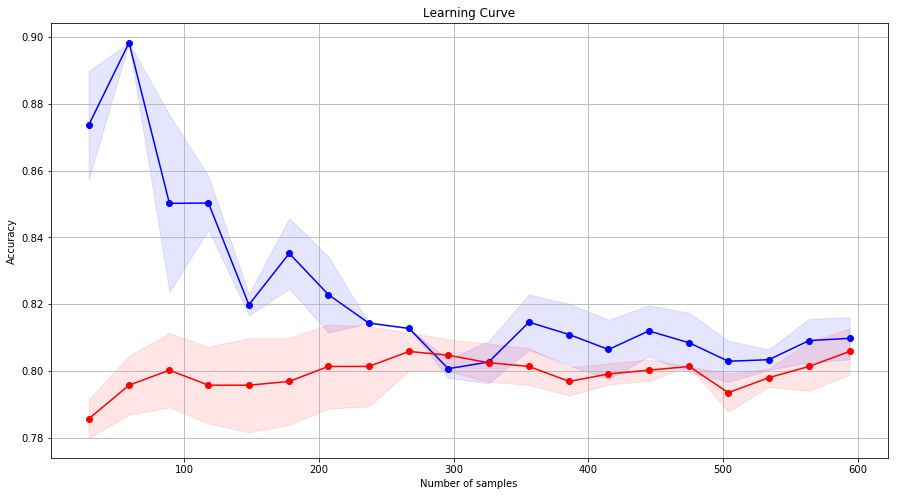

(0.8074905006044848, 0.017145791339090666)

In [39]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                       train_sizes=np.linspace(.05,1.,20), verbose=0, plot=True):
    
    # cv: number of cross validation pieces; verbose: higher the more message
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure(figsize=(15,8))
        plt.title(title)
        if ylim is not None:
            plt.ylim(ylim)
        plt.xlabel('Number of samples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                        alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                        alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Accuracy of training set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Accuracy of validation set")
        plt.draw()  # redraw the figure
        plt.show()
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1])+(test_scores_mean[-1] - test_scores_std[-1]))/2
    diff = (train_scores_mean[-1] + train_scores_std[-1] - (test_scores_mean[-1] - test_scores_std[-1]))
    return midpoint, diff

plot_learning_curve(clf, "Learning Curve", X, y)

The plotting shows no obvious overfitting in our model because the gap between the performance on training data and validation data is small.So we need to do further feature engineering to raise the performance.


In [47]:
# Look at coefficient in model to measure their importance
pd.DataFrame({"Columns":list(train_df.columns[1:]), "coef":list(clf.coef_[0].T)})

,Columns,coef
0,SibSp,-0.343198
1,Parch,-0.105600
2,Cabin_No,-0.256222
3,Cabin_Yes,0.647158
4,Embarked_C,0.000000
5,Embarked_Q,0.000000
6,Embarked_S,-0.416771
7,Sex_female,2.211540
8,Sex_male,-0.422018
9,Pclass_1,0.336732
